In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [139]:
meta = pd.read_csv('../data/contours-200-metadata.csv', index_col=0)
df = pd.read_csv('../data/contours-200-centered.csv', index_col=0)

In [141]:
df.values

array([[-1.76, -1.76, -1.76, ..., -1.76, -1.76, -1.76],
       [-4.8 , -4.8 , -4.8 , ...,  0.2 ,  0.2 ,  0.2 ],
       [-1.34, -1.34, -1.34, ..., -1.34, -1.34, -1.34],
       ...,
       [-4.04, -4.04, -4.04, ..., -2.04, -2.04, -2.04],
       [ 3.38,  3.38,  3.38, ..., -3.62, -3.62, -3.62],
       [-4.68, -4.68, -4.68, ..., -2.68, -2.68, -2.68]])

In [142]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA(n_components=2)

In [144]:
X = pca.fit_transform(df.values)

In [150]:
import pickle

In [178]:
creighton = pd.read_csv('../contours/creighton-phrase-contours.csv', index_col=0)

In [179]:
contours = creighton[[str(i) for i in range(50)]]

In [224]:
def normalize_contours(contours):
    maxima = contours.max(axis=1)[:, np.newaxis]
    minima = contours.min(axis=1)[:, np.newaxis]
    normalized_contours = (contours - minima) / (maxima - minima)
    # Fix completely flat contours
    flat_idx = np.where(maxima == minima)[0]
    normalized_contours[flat_idx, :] = 0.5
    return normalized_contours

norm = normalize_contours(contours.values)

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [221]:
flat_idx = np.where(maxima == minima)[0]

In [237]:
X = np.loadtxt('../data/mds/metric-mds-eucl-200-centered.txt.gz')

In [260]:
X = np.loadtxt('../data/pca/pca-200-smooth_derivatives.txt.gz')

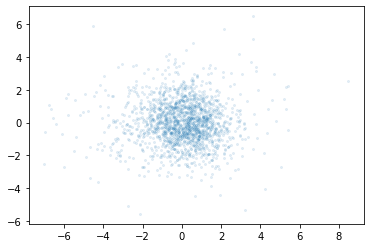

In [261]:
x,y = X.T
plt.scatter(x, y, alpha=.1, s=4)

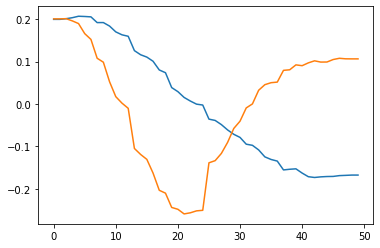

In [253]:
with open('../data/pca/pca-200-centered.model.pickle', 'br') as h:
    pca = pickle.load(h)
plt.plot(pca.components_.T)

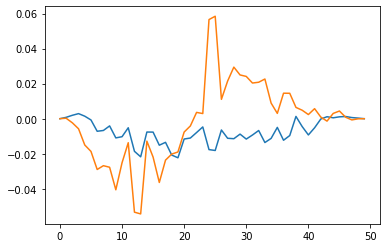

In [255]:
plt.plot(np.gradient(pca.components_, axis=1).T)

In [251]:
with open('../data/pca/pca-200-smooth_derivatives.model.pickle', 'br') as h:
    pca = pickle.load(h)

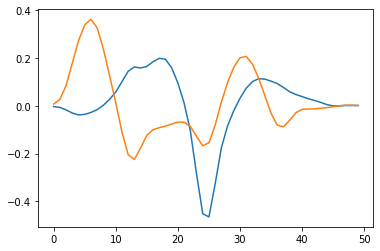

In [252]:
plt.plot(pca.components_.T)

In [219]:
norm.iloc[flat_idx,:]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,
creighton-00301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creighton-00303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creighton-00308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creighton-00783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
flat_idx

NameError: name 'flat_idx' is not defined

In [199]:
contours[np.all(np.isnan(norm), axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,
creighton-00301,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00303,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00308,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
creighton-00783,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0


In [198]:
norm.loc['creighton-00301', :]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: creighton-00301, dtype: float64

In [182]:
maxima = contours.max(axis=1)[:, np.newaxis]
minima = contours.min(axis=1)[:, np.newaxis]an
normalized_contours = (contours - minima) / (maxima - minima)

In [187]:
contours[(maxima-minima) == 0]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,
creighton-00301,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00303,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00308,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
creighton-00783,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0


In [194]:
contours[np.any(np.isnan(normalized_contours), axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,
creighton-00301,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00303,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0
creighton-00308,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
creighton-00783,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,...,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0,62.0


In [154]:
df1 = pd.read_csv('../data/contours-200-normalized.csv', index_col=0)

In [156]:
a = df1.values

In [166]:
df1[np.any(df1 == np.nan, axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,


In [176]:
df1.loc['creighton-00301', :]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: creighton-00301, dtype: float64

In [172]:
df1[np.any(np.isnan(a), axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
contour_id,,,,,,,,,,,,,,,,,,,,,
creighton-00301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
np.where(np.isnan(a) == True)

(array([469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469,
        469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469,
        469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469,
        469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [155]:
pca.fit_transform(df1.values)a

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [146]:
np.savetxt

Signature:
np.savetxt(
    fname,
    X,
    fmt='%.18e',
    delimiter=' ',
    newline='\n',
    header='',
    footer='',
    comments='# ',
    encoding=None,
)
Docstring:
Save an array to a text file.

Parameters
----------
fname : filename or file handle
    If the filename ends in ``.gz``, the file is automatically saved in
    compressed gzip format.  `loadtxt` understands gzipped files
    transparently.
X : 1D or 2D array_like
    Data to be saved to a text file.
fmt : str or sequence of strs, optional
    A single format (%10.5f), a sequence of formats, or a
    multi-format string, e.g. 'Iteration %d -- %10.5f', in which
    case `delimiter` is ignored. For complex `X`, the legal options
    for `fmt` are:

    * a single specifier, `fmt='%.4e'`, resulting in numbers formatted
      like `' (%s+%sj)' % (fmt, fmt)`
    * a full string specifying every real and imaginary part, e.g.
      `' %.4e %+.4ej %.4e %+.4ej %.4e %+.4ej'` for 3 columns
    * a list of specifiers, one pe

In [85]:
df.values[:100,:]

(1800, 50)

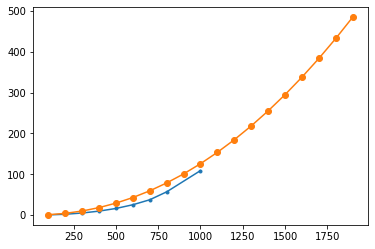

In [117]:
plt.plot(
    [100, 200,  300,  400, 500, 600, 700, 800, 1000], 
    [0.5, 2.15, 5.15, 9.8, 16.3, 25.4, 37.6, 57, 109],
    '.-')
xs = np.arange(100, 2000, 100)
plt.plot(xs, (xs/100)**2.1, 'o-' )

In [132]:
%%time
cdist_dtw(df.values[:400, :], 
          global_constraint="sakoe_chiba", sakoe_chiba_radius=20)

CPU times: user 10.6 s, sys: 51.2 ms, total: 10.7 s
Wall time: 10.7 s


array([[ 0.        , 14.77137773,  4.83739599, ..., 20.90113872,
        11.84331035, 24.52071777],
       [14.77137773,  0.        , 15.2771987 , ..., 30.03483311,
        15.20085524, 14.56285686],
       [ 4.83739599, 15.2771987 ,  0.        , ..., 24.21419418,
        12.90730026, 21.48976501],
       ...,
       [20.90113872, 30.03483311, 24.21419418, ...,  0.        ,
        28.04639727, 40.66351682],
       [11.84331035, 15.20085524, 12.90730026, ..., 28.04639727,
         0.        , 23.06414533],
       [24.52071777, 14.56285686, 21.48976501, ..., 40.66351682,
        23.06414533,  0.        ]])

In [120]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [121]:
func_fastdtw = lambda x, y: fastdtw(x, y, dist=euclidean)[0]

In [131]:
%%time
pdist(df.values[:2, :], func_fastdtw)

CPU times: user 15.8 ms, sys: 219 µs, total: 16 ms
Wall time: 16.2 ms


array([96.12])

In [ ]:
distance, path = fastdtw(x, y, dist=euclidean)

In [ ]:
from scipy.spatial import distance_matrix

In [57]:
from scipy.spatial.distance import pdist, squareform

In [52]:
a = np.arange(15).reshape(5,3)

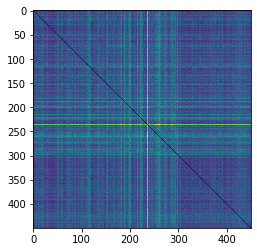

In [71]:
d = squareform(np.loadtxt('../data/sim-eucl-50-smooth_derivatives.txt'))
plt.imshow(d)

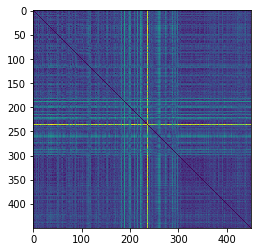

In [138]:
d = squareform(np.loadtxt('../data/similarities/sim-dtw-50-smooth_derivatives.txt.gz'))
plt.imshow(d)

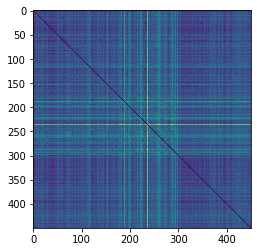

In [72]:
d = squareform(np.loadtxt('../data/sim-eucl-50-derivatives.txt'))
plt.imshow(d)

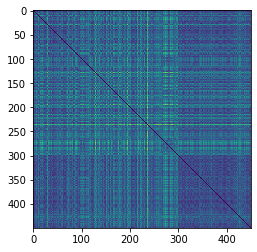

In [74]:
from tslearn.metrics import cdist_dtw

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [77]:
%%time
cdist_dtw(df.values)

CPU times: user 12.9 s, sys: 56.3 ms, total: 12.9 s
Wall time: 13 s


array([[ 0.        ,  6.08683826,  2.91060131, ..., 10.36117754,
        11.71542573,  9.7517178 ],
       [ 6.08683826,  0.        ,  7.94732659, ..., 11.29587535,
        12.78632082, 12.23764683],
       [ 2.91060131,  7.94732659,  0.        , ...,  9.89707027,
         9.48683298,  9.02496537],
       ...,
       [10.36117754, 11.29587535,  9.89707027, ...,  0.        ,
        14.20644924,  9.14131282],
       [11.71542573, 12.78632082,  9.48683298, ..., 14.20644924,
         0.        , 10.58300524],
       [ 9.7517178 , 12.23764683,  9.02496537, ...,  9.14131282,
        10.58300524,  0.        ]])

KeyboardInterrupt: 

In [65]:
pdist?

Signature: pdist(X, metric='euclidean', *args, **kwargs)
Docstring:
Pairwise distances between observations in n-dimensional space.

See Notes for common calling conventions.

Parameters
----------
X : ndarray
    An m by n array of m original observations in an
    n-dimensional space.
metric : str or function, optional
    The distance metric to use. The distance function can
    be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
*args : tuple. Deprecated.
    Additional arguments should be passed as keyword arguments
**kwargs : dict, optional
    Extra arguments to `metric`: refer to each metric documentation for a
    list of all possible arguments.

    Some possible arguments:

    p : scalar
    The p-norm to apply for Minko

In [61]:
d = pdist(a)
X = squareform(d)

In [64]:
squareform(X)

array([ 5.19615242, 10.39230485, 15.58845727, 20.78460969,  5.19615242,
       10.39230485, 15.58845727,  5.19615242, 10.39230485,  5.19615242])

In [56]:
pdist(a)

array([ 5.19615242, 10.39230485, 15.58845727, 20.78460969,  5.19615242,
       10.39230485, 15.58845727,  5.19615242, 10.39230485,  5.19615242])

In [48]:
pdist(df.values)

array([11.92392553, 10.83420509,  9.82344135, ..., 19.30854733,
       13.02382432, 14.14213562])

In [ ]:
pdist(df.values)

In [4]:
dm.shape

(450, 450)

In [37]:
indices = np.tril_indices(len(dm))
dm[indices] = 0

In [33]:
np.save('dm.npy', dm)

In [38]:
np.savetxt('test2.txt.gz', dm)

In [39]:
np.loadtxt('test2.txt.gz')

array([[ 0.        , 11.92392553, 10.83420509, ..., 13.40223862,
        14.24359505, 12.34827923],
       [ 0.        ,  0.        , 10.77032961, ..., 11.6068945 ,
        14.71393897, 13.58307771],
       [ 0.        ,  0.        ,  0.        , ..., 15.11026141,
        11.1579568 , 11.7686023 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        19.30854733, 13.02382432],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 14.14213562],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
dm[:5, :5]

array([[ 0.        , 11.92392553, 10.83420509,  9.82344135, 16.1592079 ],
       [ 0.        ,  0.        , 10.77032961,  9.12578764, 20.08432224],
       [ 0.        ,  0.        ,  0.        , 10.12324059, 18.65958199],
       [ 0.        ,  0.        ,  0.        ,  0.        , 21.88195604],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [19]:
dm[:5, :5][np.triu_indices(5, 1)]

array([11.92392553, 10.83420509,  9.82344135, 16.1592079 , 10.77032961,
        9.12578764, 20.08432224, 10.12324059, 18.65958199, 21.88195604])

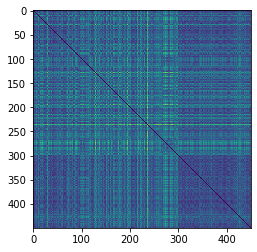

In [36]:
plt.imshow(dm)

In [11]:
meta.groupby('dataset_id').count()

,song_id,phrase_num,phrase_length,phrase_duration,mean_pitch
dataset_id,,,,,
boehme,1000,1000,1000,1000,1000
creighton,803,803,803,803,803
erk,1000,1000,1000,1000,1000
han,1000,1000,1000,1000,1000
liber-alleluias,1000,1000,1000,1000,1000
liber-antiphons,1000,1000,1000,1000,1000
liber-responsories,973,973,973,973,973
natmin,1000,1000,1000,1000,1000
shanxi,1000,1000,1000,1000,1000
